# Inference of Income Level 

## Final Report

Group: 19

Name: Jason Shi, Siying Liu, Shaoxi Guan, Guozheng Gong

## Introduction 

In today’s fast-paced world, where work often dominates our lives, understanding the factors that influence income becomes increasingly important. This report aims to explore these factors, focusing particularly on the relationship between income levels and two key variables: working hours and education level. The dataset we employ includes various factors like work class, occupation, and race, but we'll concentrate primarily on working hours and education level.

**Working Hours and Income: A Complex Relationship**

The link between productivity and working hours is a subject of much debate. As productivity increases, it's often assumed that working hours would increase correspondingly. However, the reality is more nuanced. The proliferation of leisure and entertainment options in modern life has heightened people's awareness of their working hours. These hours are pivotal in determining the amount of free time available for leisure activities. Additionally, the level of income plays a crucial role in determining the quality of leisure activities one can afford. This relationship is underscored by studies such as the one by Alexander Bick et al. (2018), which found a pattern of decreasing working hours with higher aggregate income across various demographics.

With this background, our study poses a critical question: Do individuals with higher incomes ($>50K$, as defined in our dataset) work fewer hours compared to those with lower incomes ($<=50K$)?

**Education and Income: The Interplay of Knowledge and Earnings**

Another factor closely linked with income is education level. Common wisdom and research alike often suggest that higher income is correlated with higher education. This notion finds support in studies like the one by P. de Wolff and A.R.D. van Slijpe (1973), which highlighted education as a pivotal factor in income variation. In our study, we aim to examine whether this holds true in our dataset. Specifically, we'll investigate whether a majority of the high-income group possesses advanced educational qualifications (bachelor's, master's, or doctoral degrees).

**Research Focus and Methodology**

Our research centers on analyzing income levels by delving into the variables of weekly working hours and education level. We aim to understand how these variables interact with income categories - defined as low-income ($<=50K$) and high-income ($>50K$) groups in our dataset. The mean working hours per week and the proportion of high-income individuals with higher education will serve as our key parameters.

The specific questions guiding our research are:

1. Does the high-income group work fewer hours per week on average than the low-income group?
2. Does more than half of the high-income group possess a post-secondary education?

To answer these questions, our approach involves several steps. We'll start with visual representations, such as boxplots, to provide an initial, intuitive grasp of the data distribution. Following this, we'll employ statistical methods, including bootstrapping and the Central Limit Theorem, to calculate 95% confidence intervals for our key parameters. This process is crucial in determining a range of values likely to include the parameters we're investigating, thus ensuring the reliability of our conclusions.

Once we've established our hypotheses for each question, we'll proceed to test them using the dataset. This will involve calculating test statistics and p-values to assess the strength of our findings. These steps will be detailed in the Methods and Results section of our report.

**Discussion and Interpretation**

The final part of our report will be dedicated to interpreting the results. This will involve three main areas of discussion:

1. Evaluating the p-value to determine whether our hypothesis can be rejected or not. This will help us ascertain if there's sufficient evidence to support our initial assumptions.
2. Relating the findings back to our research questions. This will involve assessing whether the results align with our expectations or if they present new, unexpected insights.
3. Considering future research directions and the broader implications of our findings. This will include discussing potential areas of exploration that could build on our study and examining the relevance of our findings in the wider context of socio-economic research.

In essence, through this report, we aim to contribute to the ongoing discussion about the dynamics of income in relation to working hours and education. By shedding light on these relationships, we hope to provide valuable insights for policymakers, educators, and individuals striving to understand the factors that shape financial success in the modern world.


## Methods and Results

In [26]:
# Load packages
library(tidyverse)
library(repr)
library(tidymodels)

options(repr.matrix.max.rows = 6)

In [27]:
#Unzip and read data
temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/2/adult.zip", temp)
work_data <- read_csv(unz(temp, "adult.data"), col_names = FALSE)
unlink(temp)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
# head of data
head(work_data)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


_Table 1: loaded dataset_

In [29]:
# Adding column names
names <- c("age","workclass","Identification","education",
           "education-num","marital-status","occupation","relationship",
           "race","sex","capital-gain",
           "capital-loss","hours_per_week","native-country",
          "income")
colnames(work_data) <- names
head(work_data)

age,workclass,Identification,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


_Table 2: loaded dataset with column name_

### Question 1
We used INCOME LEVEL and HOURS WORKED PER WEEK, to examine work hour.

1. To figure out whether mean of work hours per week for income >50k people is higher than that of income <= 50k people , we will use hypothesis test:
$$H_0: \mu_{\text{ $\leq$ 50k}} - \mu_{\text{> 50k}} = 0$$ 
$$H_1: \mu_{\text{ $\leq$50k}} - \mu_{\text{> 50k}} < 0$$ 
$$CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}$$
where $z^*$ is the quantile of a standard Normal.

Let's first look at relationship between income and hours worked per week.

In [30]:
#Selecting columns of interest
work_data_income_hours <- work_data |>
select(income, hours_per_week)

head(work_data_income_hours)

income,hours_per_week
<chr>,<dbl>
<=50K,40
<=50K,13
<=50K,40
<=50K,40
<=50K,40
<=50K,40


_Table 3: income with hours per week_

Visualize hours worked based on income with boxplot. 

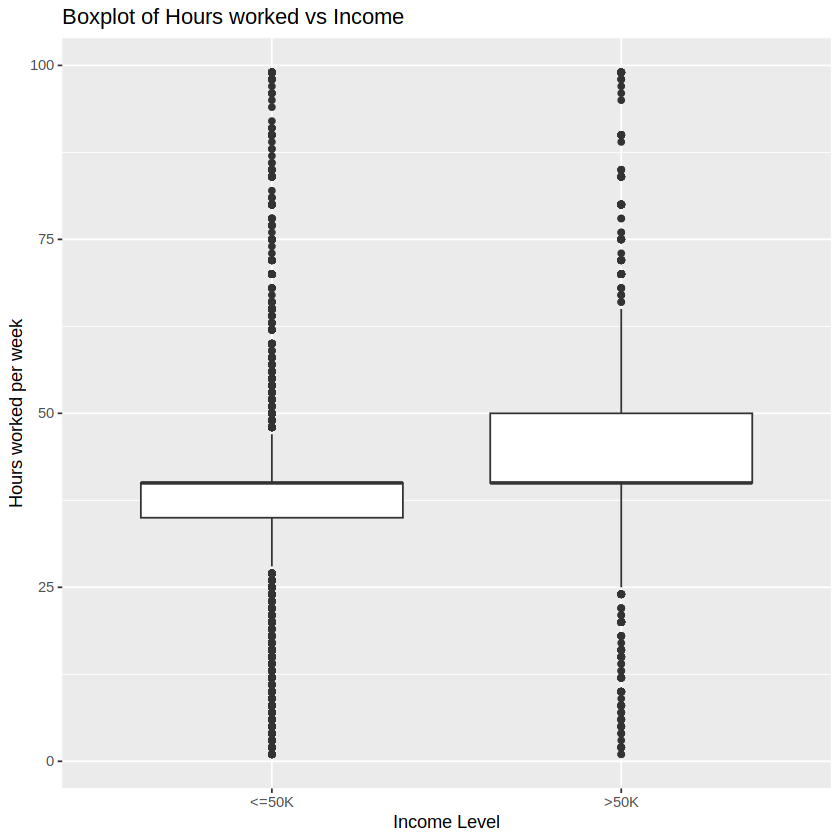

In [31]:
# making boxplot
work_boxplot <- work_data_income_hours |>
ggplot(aes(x=income, y = hours_per_week)) + 
geom_boxplot() + 
labs(x = "Income Level", y = "Hours worked per week", title = "Boxplot of Hours worked vs Income")

work_boxplot

_Figure 1: boxplot for hours worked per week for different income level_

We see most income $>50$K people work more hours than income $<=50$K people.

First, obtain the sample mean, sample variance and sample size.

In [32]:
#create summary table
hours_summary <- 
     work_data_income_hours%>% 
     filter(!is.na(hours_per_week)) %>% 
     group_by(income) %>% 
     summarise(sample_mean = mean(hours_per_week), 
               sample_var = var(hours_per_week), 
               n = n())
hours_summary

income,sample_mean,sample_var,n
<chr>,<dbl>,<dbl>,<int>
<=50K,38.84021,151.7576,24720
>50K,45.47303,121.2855,7841


_Table 4: summary for income with hours per week_


Comparing the means of two independent populations, we will use two sample t-test.


$$\mu_1 : \mu_{\leq 50k}$$
$$\mu_2 : \mu_{>50k}$$


The test statistic we will use:

Test statistic: 

$$
T = \frac{\mu_{1}-\mu_{2} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Since we have the null hypothesis $$H_0: \mu_1 - \mu_2 = 0$$ 

So $d_0 = 0$, then we have:
$$
T = \frac{\mu_{1}-\mu_{2} }{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

First, we will try to obtain the 95% confidence interval:

$$CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}$$

In [33]:
# splitting data based on different category
less50 <- 
    work_data_income_hours %>% 
    filter(income == '<=50K') %>% 
    pull(hours_per_week)

greater50 <- 
    work_data_income_hours %>% 
    filter(income == '>50K') %>% 
    pull(hours_per_week)

# getting 95% confidence interval
hours_diff_means_ci <- 
     tibble(
         lower_ci = mean(less50) - mean(greater50) - qnorm(0.975) * sqrt(var(less50)/length(less50) + var(greater50)/length(greater50)),
         upper_ci = mean(less50) - mean(greater50) + qnorm(0.975) * sqrt(var(less50)/length(less50) + var(greater50)/length(greater50))
     )


hours_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-6.920919,-6.344713


Then, we can use bootstrapping to obtain the confidence interval:

In [34]:
#resample 400 times to get bootstrap of difference working hours for different income level
bootstrap_distribution_means <- specify(work_data_income_hours, formula = hours_per_week~income) %>%
    generate(type = "bootstrap", reps = 400) %>%
    calculate(stat = "diff in means", order=c("<=50K",">50K"))

In [35]:
#get 95% confidence interval
bootstrap_ci_hours <- get_ci(bootstrap_distribution_means, level = 0.95, type = 'percentile')
print(bootstrap_ci_hours)

# A tibble: 1 × 2
  lower_ci upper_ci
     <dbl>    <dbl>
1    -6.95    -6.39


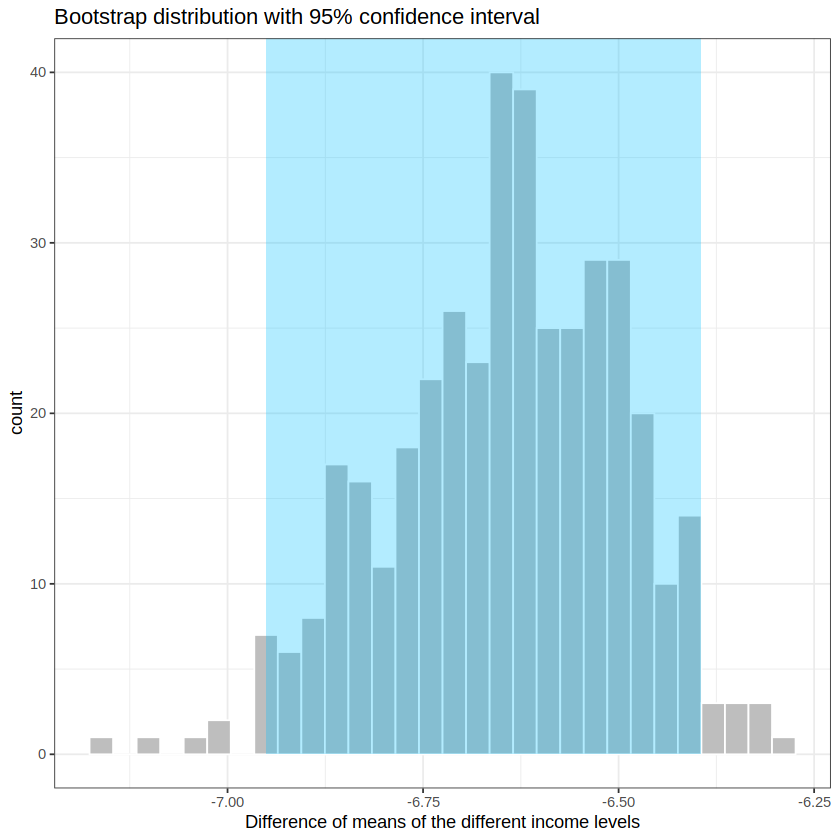

In [36]:
#visualization of confidence interval
ci_plot <- 
    bootstrap_distribution_means %>% 
    ggplot(aes(x = stat)) +
    geom_histogram(bins=30,colour = "white", fill = "grey") +
    annotate("rect", xmin = bootstrap_ci_hours$lower_ci, xmax = bootstrap_ci_hours$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    labs(title = "Bootstrap distribution with 95% confidence interval",
         x = "Difference of means of the different income levels") +
    theme_bw()
ci_plot

In [37]:
# calculate test statistics for t-test
mean_1 <- hours_summary$sample_mean[1]
mean_2 <- hours_summary$sample_mean[2]
var_1 <- hours_summary$sample_var[1]
var_2 <- hours_summary$sample_var[2]
n_1 <- 24720
n_2 <- 7841

t <- (mean_1 - mean_2) / sqrt(var_1/n_1 + var_2 / n_2)
t

[1] -45.1231

We get the confidence interval $[-6.920919, -6.344713]$ by calculating directly or by using boostraping. We can conclude that: we have 95% confidence that the difference in the mean of work hours per week between people’s income <=50k and >50k is lying between $[-6.920919, -6.344713]$. This seems to show that means time worked by people whose income is >50 is greater than that of the people whose income is <=50.

Since we need to do a t-test, we will use the function $pt()$ and use $df$ = $n_1$ + $n_2$ - 2 to get the p-value. Before we go any further, we note that we are setting our signifcance level to $5\%$.

In [38]:
#calculate p-value
df = n_1 + n_2 - 2
p_value <- pt(t, df = 24720 + 7841 - 2)
p_value

[1] 0

In [39]:
# splitting data based on different category
le50 <- filter(work_data_income_hours, income == "<=50K") |> select(hours_per_week)
g50 <- filter(work_data_income_hours, income == ">50K") |> select(hours_per_week)
# summarize t-test result
two_sample_test <- 
    tidy(
        t.test(x = less50,
               y = greater50,
               alternative = "less"))
two_sample_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-6.632816,38.84021,45.47303,-45.1231,0,14570.18,-Inf,-6.391017,Welch Two Sample t-test,less


For the visualization of p-value, since we are obtaining 0 as p-value (which actually is not exactly 0 but some very small figure), the distribution with the p-value we have got is not very meaningful. So we decide to discuss the p-value with the t.test table rather than visualize the distribution.

We are using a $5\%$ significance level to test our p-value. Since we are using the whole dataset as a sample, the degree of freedom is very large. Therefore, we get a p-value which is very close to 0 (we do not actually have a p-value of 0, R is just rounding). Then we can conclude that we reject the null hypothesis since the p-value is less than the significance level. We have sufficient evidence to say that people whose income is $>50K$ work longer than people whose income is $<= 50K$.

### Question 2
To figure out whether over half of >50k income poeple have post-secondary education, we will use hypothesis test:

Set $$p_{\text{post-secondary education}}= p_0$$

Then we have hypothesis:
$$H_0: p_0 = 0.5$$ 
$$H_1: p_0 > 0.5$$. 

And confidence interval is 
$$CI\left(p\right) = \hat{p} \pm z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$
where $z^*$ is the quantile of a standard Normal.

Now let's look at the relationship between income and education. First, we need to refactor the `education` column. The value `1` corresponds to no post-secondary education and value `2` corresponds to post-secondary education. 

In [40]:
#select columns we need, and set categories for different education level
work_data_income_edu <- work_data |>
select(income, education) |>

mutate(education_level = ifelse(education %in% c("Bachelors",
                                               "Some-college", 
                                               "Masters", 
                                               "Doctorate"),
                                "2", "1")) |>
select(-education)
head(work_data_income_edu)

income,education_level
<chr>,<chr>
<=50K,2
<=50K,2
<=50K,1
<=50K,1
<=50K,2
<=50K,2


_Table 5: education level for different income_

Let's visualize the relationship with a bar graph.

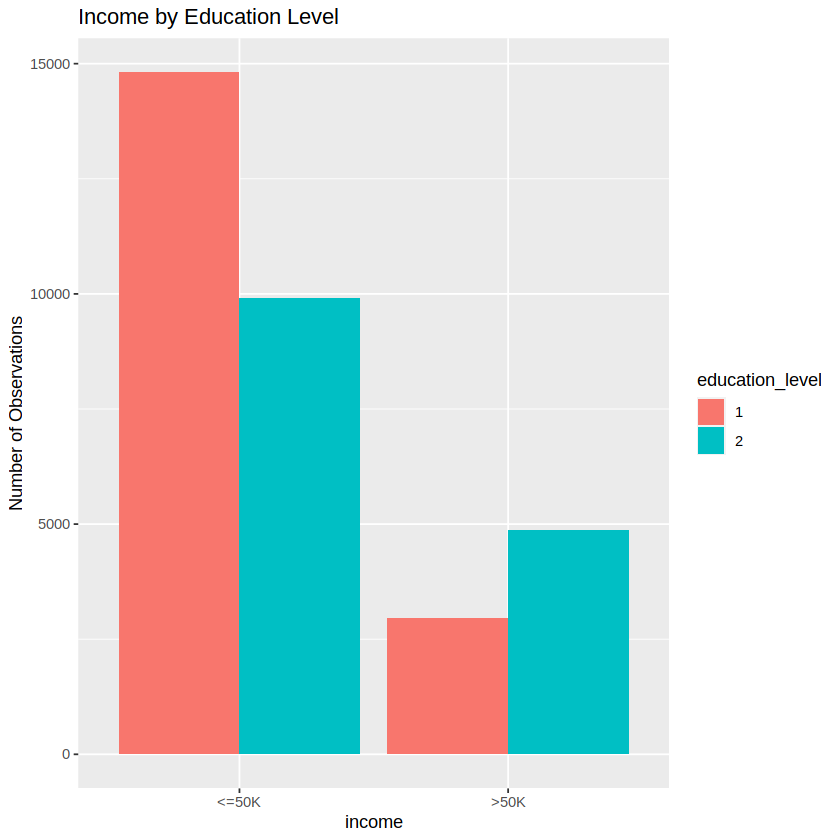

In [41]:
# make barplot
bar_work_data_income_edu <- work_data_income_edu |> 
ggplot(aes(income, after_stat(count))) + 
geom_bar(aes(fill = education_level), position = "dodge") +
labs(y = "Number of Observations", title = "Income by Education Level")

bar_work_data_income_edu

_Figure 2: plot of education level for different income_

Most income $<=50$K people have education level `1`. Most income $>50$K people have education level `2`.

First, we will obtain the 95% confidence interval.

In [42]:
# count different education level for income >50K
work_data_greater_2 <- work_data_income_edu |>
                        filter(income == ">50K")

work_data_greater_2_summary <- work_data_greater_2|> 
                        group_by(education_level) |> 
                        summarise(n = n())

work_data_greater_2_summary

education_level,n
<chr>,<int>
1,2968
2,4873


_Table 6: count for education level of >50K income people_

In [43]:
# summarize different education level for income >50K
n <- nrow(work_data_greater_2)
p_hat <-  work_data_greater_2_summary$n[2] / n
std_error <- sqrt(p_hat * (1-p_hat) / n)

cat("The phat estimate is", round(p_hat, 6), "\nThe std. error estimate is", round(std_error, 6))

The phat estimate is 0.621477 
The std. error estimate is 0.005477

Then, we can obtain the 95% confidence interval with the values obtained above,

In [44]:
#calculate 95% confidence interval
prop_greater50_2_ci <- tibble(
    lower_ci = qnorm(0.05, mean = p_hat, sd = std_error),
    upper_ci = qnorm(0.95, mean = p_hat, sd = std_error)
)
prop_greater50_2_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.6124674,0.6304863


Then we can obtain the 95% confidence interval by bootstrpping.

In [45]:
# do bootstrapping
bootstrap_distribution <- specify(filter(work_data_income_edu, income == ">50K"), response = education_level, success = "2") %>%
    generate(type = "bootstrap", reps = 300) %>%
    calculate(stat = "prop") 

In [46]:
#calculate 95% confidence interval
bootstrap_ci_edu <- bootstrap_distribution %>%
    get_ci(level = 0.95, type = 'percentile')
print(bootstrap_ci_edu)

# A tibble: 1 × 2
  lower_ci upper_ci
     <dbl>    <dbl>
1    0.611    0.632


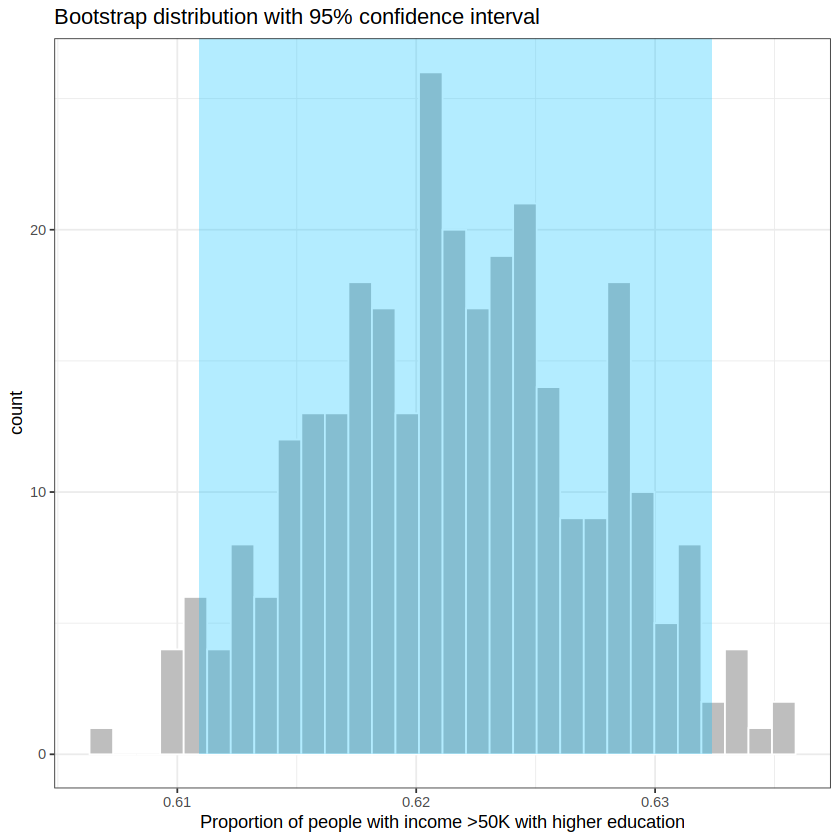

In [47]:
#visualization of confidence interval
ci_plot <- 
    bootstrap_distribution %>% 
    ggplot(aes(x = stat)) +
    geom_histogram(bins=30,colour = "white", fill = "grey") +
    annotate("rect", xmin = bootstrap_ci_edu$lower_ci, xmax = bootstrap_ci_edu$upper_ci, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    labs(title = "Bootstrap distribution with 95% confidence interval",
         x = "Proportion of people with income >50K with higher education") +
    theme_bw()
ci_plot

By calculating directly and using bootstrapping and looking at the visualization above, we get two very close intervals, which are $[0.6124674, 0.6304863]$ and $[0.611, 0.633]$ respectively. We can conclude that we have 95% confidence that the proportion of income $>50K$ people whose education level is greater than post-secondary is lying in the interval $[0.6124674, 0.6304863]$. 

The sample proportion is higher than $0.5$. But we are not sure that if it is enough for us to confidently claim that true proportion is higher than $0.5$. To answer this question, calculate the test statistic and obtain the p-value. Note that we are using a significance level of $5\%$.

In [48]:
# calculate test statistic
p_test_statistic <-  (p_hat - 0.5) / (sqrt(0.5*0.5/ n) )
p_test_statistic

[1] 21.51341

In [49]:
#calculate p value of the test
p_value <- pnorm(p_test_statistic, lower.tail = FALSE)
p_value

[1] 5.830464e-103

For the visualization of this question, since we are getting 5.830464e-103 as the p-value. Similarly, the distribution with p-value and test statistic is not very meaningful. So we also decide to discuss the p-value with the table below.

In [50]:
# summary test result
test_summary <- 
    tidy(
        prop.test(
        x = 4873,
        n = 4873 + 2968, 
        p = 0.5,
        alternative = "greater",
        conf.level = 0.05,
        correct = FALSE))
test_summary

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.6214769,462.8268,5.830464e-103,1,0.630443,1,1-sample proportions test without continuity correction,greater


Since the p-value is less than our significance level of $5\%$, we will reject null hypothesis. We therefore conclude that there is sufficient evidence that most people whose income is $>50K$ have a higher education level.

### Compare bootstrapping and asymptotics
For our question, it looks like both methods are accurate. We believe this is because our sample size is very large, which implies a good representation of the population. Because of this, our bootstrapping seems to be quite accurate. <br>
Also, the result of the confidence interval is very similar. I think this is also because of our large sample size. In conclusion, both of these methods give very simialr results and are trustworthy. 

## Discussion

To reiterate, the 2 main questions we wanted to answer are:
1. Is the mean of work hours per week for income >50K people higher than that of people with income ≤50k?
2. Do more than 50% of people with income >50K have post-secondary education?

The analysis of our data, particularly from the boxplot in Figure 1, leads to some intriguing insights about the relationship between income and work hours. At first glance, it seems those earning over 50 thousand annually are clocking in more hours each week compared to those earning 50 thousand or less. While the boxplot alone doesn't give us the full story, the statistical test we conducted adds a significant layer of understanding. After calculating the p-value and considering our 5% significance level, we've reached a point where we can confidently reject the null hypothesis. Since we are using the t-test to obtain our p-value, the degree of freedom we are using here is the sum of two sample size and subtract 2, and we are having a quite large sample size here, as a result, the showing p-value is 0 but actual one should be a number not 0 but really close to it. Large sample size will give a better view of accessing the population parameter. So this rejection isn't a small matter. It strongly suggests that the average work hours per week for the higher-earning group is indeed more than their lower-earning counterparts. However, it is crucial to recognize the limitations of this analysis. While there appears to be a correlation, causation cannot be inferred. The higher number of work hours might contribute to higher income, but it could also be that higher-income jobs demand longer hours.

For our second question, the bar graph part of the preliminary results (Figure 2) seems to show that the majority of people with income >50K do indeed have post-secondary education. But of course, we must do further analysis as Figure 2 is not enough alone. Based on our p-value of approximately 5.83e-10 and a significance level of 5%, we reject our null hypothesis that the proportion of people with income >50K with post-secondary education is equal to 50%. Based on these results, it seems that putting more hours into work and post-secondary education positively contributes to one’s income level. These findings are reasonable and corroborate with current literature (Alexander Bick et., 2018). This finding is intuitive, as increased education typically opens doors to higher-paying jobs, and longer work hours can directly contribute to higher earnings.

Future research could explore other variables that positively impact income levels. For instance, understanding the role of networking, mentorship, and professional development in career advancement could provide valuable insights. Research could also examine how technological skills, adaptability to change, and continuous learning contribute to financial success in a rapidly evolving job market. Moreover, investigating systemic barriers, such as gender and racial wage gaps, is crucial for a holistic understanding of income dynamics. This research could help identify strategies for equitable access to high-paying jobs and career advancement opportunities. Understanding these factors is especially relevant for individuals seeking financial stability or freedom. By identifying key drivers of income beyond education and work hours, people can make more informed decisions about their careers and personal development. This research could also guide policymakers and educational institutions in designing programs and policies that support individuals in achieving their financial goals.



## References

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Bick, Alexander, Nicola Fuchs-Schündeln, and David Lagakos. 2018. "How Do Hours Worked Vary with Income? Cross-Country Evidence and Implications." American Economic Review, 108 (1): 170-99.  DOI: 10.1257/aer.20151720

P. de Wolff, A.R.D. van Slijpe,The relation between income, intelligence, education and social background, European Economic Review, Volume 4, Issue 3, 1973, Pages 235-264, ISSN 0014-2921, https://doi.org/10.1016/0014-2921(73)90014-7 